In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [67]:
data=pd.read_csv(r"C:\Users\subha\OneDrive\Desktop\Student_Performance.csv")

In [68]:
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


### Data Preprocessing

In [69]:
df=data.copy()

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [71]:
df.nunique()

Hours Studied                        9
Previous Scores                     60
Extracurricular Activities           2
Sleep Hours                          6
Sample Question Papers Practiced    10
Performance Index                   91
dtype: int64

In [72]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [73]:
df.duplicated().sum()

127

In [74]:
df=df.drop_duplicates()

In [75]:
df.duplicated().sum()

0

In [76]:
df.shape

(9873, 6)

In [77]:
df['Performance Index']=df['Performance Index'].astype('int64')

In [78]:
df['Extracurricular Activities']=df['Extracurricular Activities'].map({'Yes':1, 'No':0})

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     9873 non-null   int64
 1   Previous Scores                   9873 non-null   int64
 2   Extracurricular Activities        9873 non-null   int64
 3   Sleep Hours                       9873 non-null   int64
 4   Sample Question Papers Practiced  9873 non-null   int64
 5   Performance Index                 9873 non-null   int64
dtypes: int64(6)
memory usage: 539.9 KB


### EDA

In [80]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66


<Axes: >

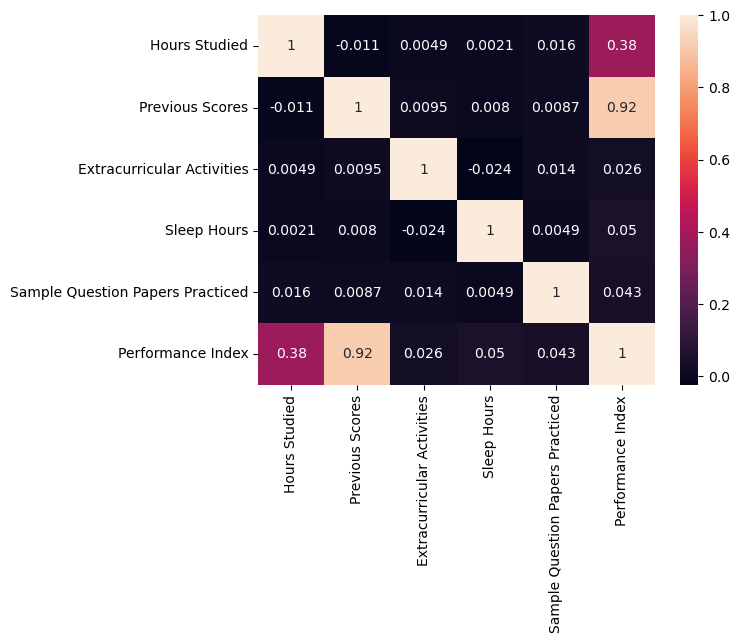

In [81]:
sns.heatmap(df.corr(), annot=True)

In [82]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,0.494986,6.531652,4.583004,55.216651
std,2.589081,17.325601,0.500000,1.697683,2.867202,19.208570
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


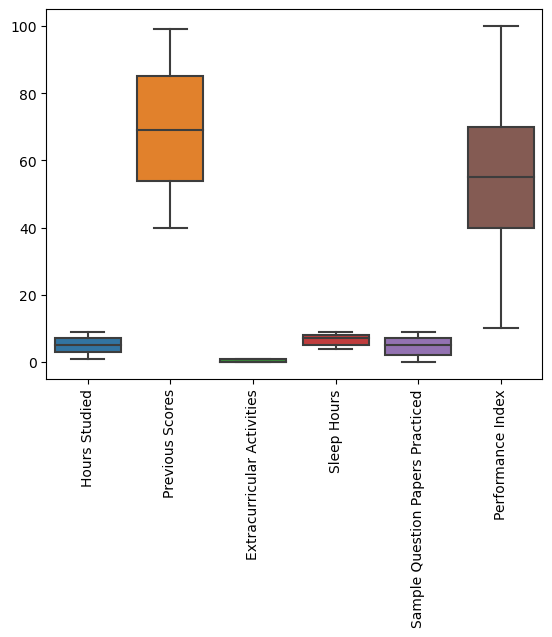

In [83]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [84]:
df['Hours Studied'].value_counts(bins=(1,3,5,7,9))
df['Hours Studied']=pd.cut(df['Hours Studied'], bins=(1,3,5,7,9))

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

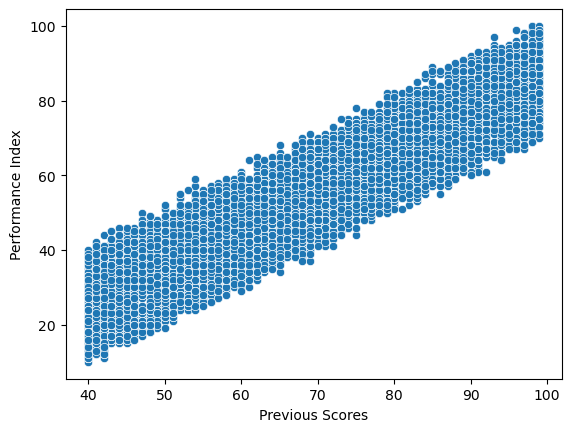

In [85]:
sns.scatterplot(df, x='Previous Scores', y='Performance Index')

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

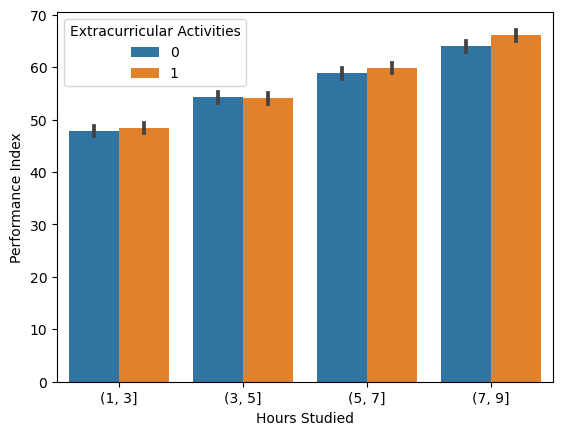

In [86]:
sns.barplot(df, x='Hours Studied', y='Performance Index', hue='Extracurricular Activities')

In [87]:
df['Sleep Hours'].value_counts(bins=[3,5,7,9])
df['Sleep Hours']=pd.cut(df['Sleep Hours'], bins=(3,5,7,9))

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

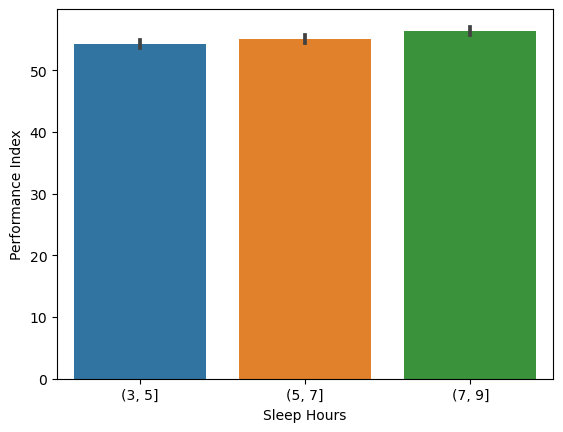

In [88]:
sns.barplot(df, x='Sleep Hours', y='Performance Index')

In [89]:
df['Sample Question Papers Practiced'].value_counts(bins=(0,4,7,10))
df['Sample Question Papers Practiced']=pd.cut(df['Sample Question Papers Practiced'], bins=(0,4,7,10))

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

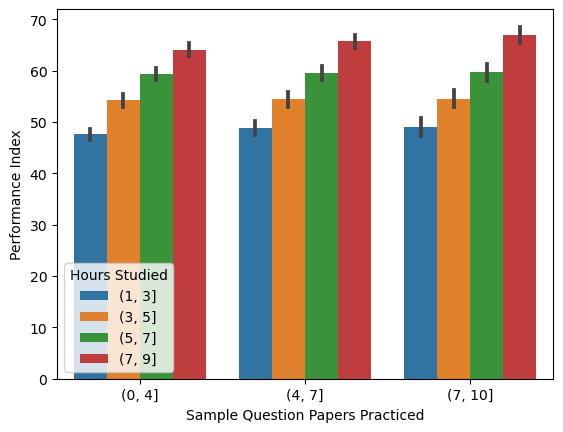

In [90]:
sns.barplot(df, x='Sample Question Papers Practiced', y='Performance Index', hue='Hours Studied')

<Axes: ylabel='Sample Question Papers Practiced'>

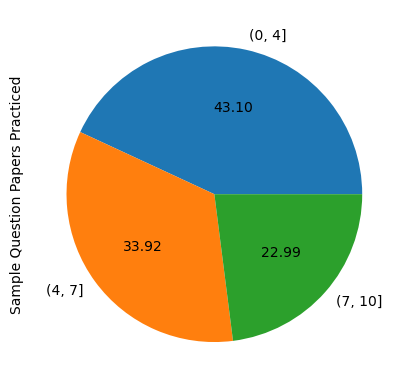

In [91]:
df['Sample Question Papers Practiced'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: ylabel='Hours Studied'>

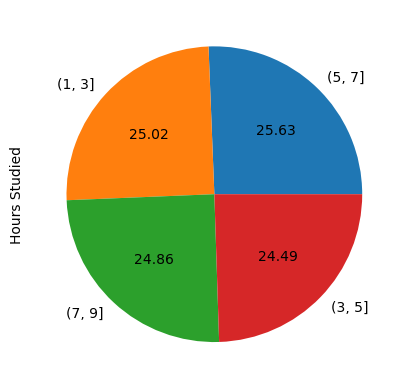

In [92]:
df['Hours Studied'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: ylabel='Extracurricular Activities'>

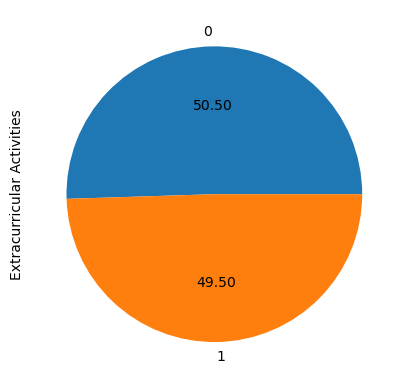

In [93]:
df['Extracurricular Activities'].value_counts().plot(kind='pie', autopct='%.2f')

### Model

In [94]:
dat=data.copy()

In [95]:
dat=dat.drop_duplicates()

In [96]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


In [97]:
dat['Performance Index']=dat['Performance Index'].astype('int64')

In [98]:
dat['Extracurricular Activities']=dat['Extracurricular Activities'].map({'Yes':1, 'No':0})

In [99]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     9873 non-null   int64
 1   Previous Scores                   9873 non-null   int64
 2   Extracurricular Activities        9873 non-null   int64
 3   Sleep Hours                       9873 non-null   int64
 4   Sample Question Papers Practiced  9873 non-null   int64
 5   Performance Index                 9873 non-null   int64
dtypes: int64(6)
memory usage: 539.9 KB


In [109]:
X=dat.iloc[:,:-1]
Y=dat.iloc[:,-1]
X.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


In [113]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [120]:
X=pd.DataFrame(X)
X

,0,1,2,3,4
0,0.775566,1.706168,1.010078,1.454025,-1.249715
1,-0.383205,0.724912,-0.990022,-1.491315,-0.900925
2,1.161822,-1.064438,1.010078,0.275889,-0.900925
3,0.003052,-1.006717,1.010078,-0.902247,-0.900925
4,0.775566,0.320865,-0.990022,0.864957,0.145444
...,...,...,...,...,...
9868,-1.541976,-1.179880,1.010078,-1.491315,-0.900925
9869,0.775566,-0.314066,1.010078,0.864957,0.145444
9870,0.389309,0.782633,1.010078,0.864957,0.145444
9871,1.548079,1.590727,1.010078,0.275889,-1.598505


In [121]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=30)

In [126]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [127]:
pred=model.predict(x_test)

In [130]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 Score:", r2_score(pred, y_test))
print("MSE:", mean_squared_error(pred, y_test))

R2 Score: 0.988340753548494
MSE: 4.126813886047094


In [132]:
y_test[:10]

1938    42
5046    67
2110    65
7570    78
1365    45
6713    85
7138    59
5441    72
9201    82
6104    74
Name: Performance Index, dtype: int64

In [131]:
pred[:10]

array([41.1742463 , 65.19121425, 64.56328449, 77.66715627, 44.47328301,
       84.54600345, 59.02824777, 71.10997232, 79.56319203, 74.2287975 ])

In [148]:
import statsmodels.api as sm
xc=sm.add_constant(dat.iloc[:,:-1])

In [149]:
xc.head()

,const,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,1.0,7,99,1,9,1
1,1.0,4,82,0,4,2
2,1.0,8,51,1,7,2
3,1.0,5,52,1,5,2
4,1.0,7,75,0,8,5


In [150]:
result=sm.OLS(Y,xc).fit()

In [151]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.724e+05
Date:                Mon, 15 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:23:03   Log-Likelihood:                -21065.
No. Observations:                9873   AIC:                         4.214e+04
Df Residuals:                    9867   BIC:                         4.219e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              -34.0689      0.128   -265.875      0.000     -34.320     -33.818
Hours Studied                        2.8527      0.008    358.940      0.000       2.837       2.868
Previous Scores                      1.0183      0.001    857.427      0.000       1.016       1.021
Extracurricular Activities           0.6167      0.041     14.981      0.000       0.536       0.697
Sleep Hours                          0.4803      0.012     39.623      0.000       0.457       0.504
Sample Question Papers Practiced     0.1939      0.007     27.017      0.000       0.180       0.208
==============================================================================
Omnibus:                        3.123   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                3.224
Skew:                           0.014   Prob(JB):                        0.200
Kurtosis:                       3.084   Cond. No.                         451.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""